In [146]:
import pandas as pd
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from pandas.plotting import scatter_matrix
import numpy as np


In [147]:
df=pd.read_csv("carsnew.csv")

In [148]:
df.head()

,Unnamed: 0,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,binaryClass
0,1,chevrolet_chevelle_malibu,17,8,307.0,16,3504,12.0,70,P
1,2,buick_skylark_320,7,8,350.0,34,3693,11.5,70,P
2,3,plymouth_satellite,17,8,318.0,28,3436,11.0,70,P
3,4,amc_rebel_sst,9,8,304.0,28,3433,12.0,70,P
4,5,ford_torino,13,8,302.0,23,3449,10.5,70,P


In [149]:
dd=df.iloc[:,2:10]

In [150]:
dd['horsepower']=dd['horsepower'].astype(float).astype(int)
dd['acceleration']=dd['acceleration'].astype(float).astype(int)

dd['displacement']=dd['displacement'].astype(float).astype(int)

In [151]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
mpg             406 non-null int64
cylinders       406 non-null int64
displacement    406 non-null int64
horsepower      406 non-null int64
weight          406 non-null int64
acceleration    406 non-null int64
model.year      406 non-null int64
binaryClass     406 non-null object
dtypes: int64(7), object(1)
memory usage: 25.4+ KB


In [152]:
dd["binaryClass"]=pd.factorize(dd["binaryClass"])[0]

In [153]:
X=dd.iloc[:,:-1]
y=dd.iloc[:,-1]


In [73]:
from sklearn.model_selection import train_test_split
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X, y, test_size=0.3,random_state=0)

In [92]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca=PCA(n_components=2).fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(pca,y, test_size=0.2, random_state=100)

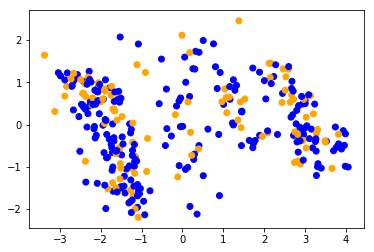

In [155]:
plt.scatter(X_train[:, 0], X_train[:, 1],c=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}))##
        

In [156]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

## K-Neig

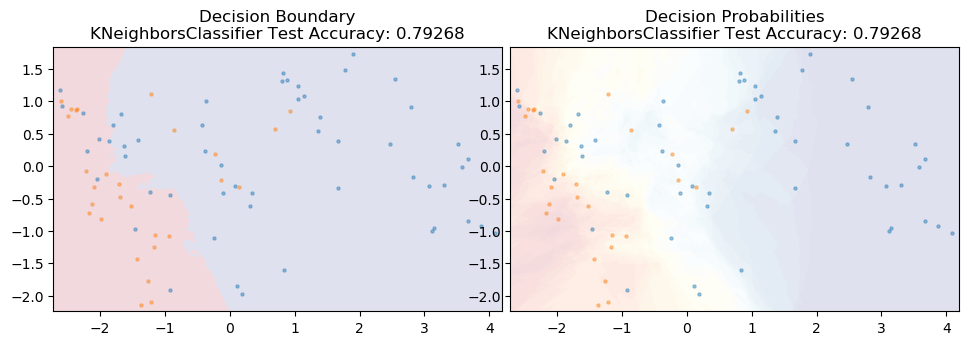

In [164]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [111]:
from sklearn import cross_validation, datasets, grid_search, linear_model, metrics
model.get_params().keys()

['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [112]:
knn_params = {'n_neighbors': range(1, 40)}

In [165]:
accuracy_score(y_test, clf.predict(X_test))

0.7926829268292683

In [137]:
pred=model.predict(X_test)

In [166]:
accuracy_score(y_train, model.predict(X_train))

0.8179012345679012

In [116]:
accuracy_score(y_test, pred)

0.7131147540983607

In [160]:
cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter = 10, test_size = 0.2, random_state = 0)
knn = KNeighborsClassifier(algorithm = 'auto')
clf = GridSearchCV(knn, knn_params, cv=5, scoring="accuracy")
clf.fit(X_train,y_train)
clf.best_params_

{'n_neighbors': 30}

In [161]:
knn_grid = GridSearchCV(knn, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [162]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [163]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 30}, 0.8117283950617284)

## SVC 

In [144]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),
('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},
{'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
scoring='accuracy', cv=10,
n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_) # перекрестно-проверочная точность 0.978021978022
print(gs.best_params_) # наилучшие параметры
{'clf__C': 0.1, 'clf__kernel': 'linear'}

0.8055555555555556
{'clf__gamma': 10.0, 'clf__C': 1.0, 'clf__kernel': 'rbf'}


{'clf__C': 0.1, 'clf__kernel': 'linear'}

In [145]:
clf=gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7073170731707317